# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

#### **Group 62**
#### **UDIT DHAND (umd84)**
#### **SANYAM JAIN (sj33448)**

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

(a)
- **Model Bias:**
  This bias refers to error introduced by simplistic model/assumptions to predict complex problem. It relates to the flexibility of the model and its assumptions in making predictions across different regions of the predictor space. A model with high bias is too restrictive and fails to capture the underlying trends in the data, leading to difference between the model’s predictions on average and the true values for the complex problem leading to underfitting.

- **Point Estimator Bias:**
  The bias of a point estimator concerns whether the expected value of the estimator (eg, the sample mean) aligns with the true population it is estimating (eg, the population mean). If there is a difference between the expected value of the estimator and the true parameter value, the estimator is said to be biased.

- In essence, model bias relates to the adequacy and flexibility of a model in capturing underlying data patterns, while point estimator bias relates to the accuracy of the  statistical estimator in reflecting the true population parameter.

(b)
#### Overfitting:
   - If a model is overfitting, the training error will be very low because the model learns the training data too well, capturing the noise along with the underlying pattern.
   - But the validation error will be high compared to the training error, meaning the model is not too good on unseen data.

- **Learning Curve (Overfitting):**
   - The training error curve will be close to zero.
   - The validation error curve will be much higher and may even increase as the model starts to fit to the noise in the training data.
   - A large gap between the training and validation error curves is an indicator of overfitting.

##### Underfitting:
   - When a model is underfitting, it is too simplistic and cannot capture the underlying patterns in the data.
   - Both the training and validation errors will be high as the model performs poorly on both seen and unseen data.

- **Learning Curve (Underfitting):**
   - The training error curve will be high and may not decrease significantly with more training.
   - The validation error curve will also be high and close to the training error curve.
   - A small gap between the training and validation error curves along with high error may indicate underfitting.



# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [1]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  # Compute y according to the labeling function g
  y = 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * (x ** 2)) + np.random.normal(loc=0, scale=1, size=x.shape[0])

  ### END CODE ###
  return x,y

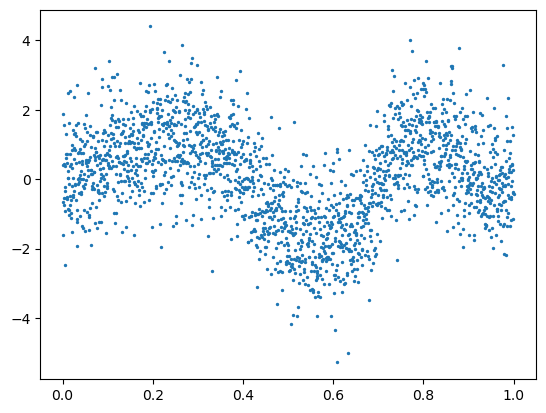

In [2]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Plot y v.s. x of any one of the dataset
plt.scatter(datasets[0]['X'],datasets[0]['Y'],s=2)
### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [3]:
### START CODE ###
# Implement Estimator

def estimator(y,k):
    m = len(y)//k
    rem = len(y)%k
    y_pred = []

    for i in range(k):
        first_idx = i*m
        last_idx = first_idx + m
        y_mean = sum(y[first_idx:last_idx])/m
        y_pred.extend([y_mean] * m)
        
    if rem > 0:
        y_mean = sum(y[-rem:]) / rem  # Calculate the mean of the remainder
        y_pred.extend([y_mean] * rem)

    return y_pred
### END CODE ###

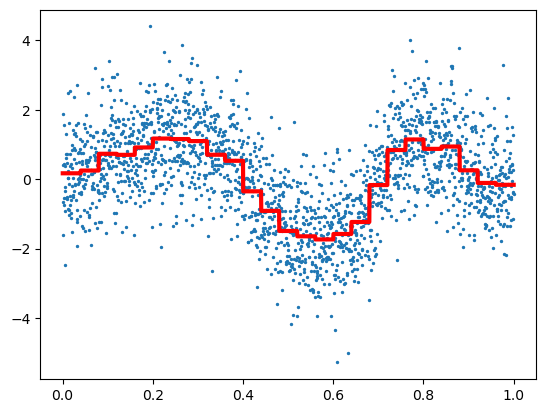

In [4]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
plt.scatter(datasets[0]['X'],datasets[0]['Y'],s=2)
plt.plot(datasets[0]['X'],estimator(datasets[0]['Y'],25),color = 'red',lw = 3)
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?


### Answer: ###
1. Mean Squared Error (MSE) of the model on sample data will reduce as we increase the number of bins (K), this is because we are making predictions for more specific regions in x space, which means our predictions will be closer for more datapoints than not compared to when we have fewer bins. This is because, for fewer bins our predictions are average of more varied datapoints, which make the predictions less accurate.

2. Bias will reduce because our average prediction over many samples will get closer to the true value, because we are looking at more specific, smaller regions, giving the model more flexibility. However, this also means our predictions can vary a lot based on training sample, so having too many bins might not be the best idea in general.

3. Variance will increase as we increase K, because our model starts to follow the training data very closely, which might not always represent the whole population accurately. So, different sets of training data will give us different predictions for the same input, making our model’s predictions more varied.




d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

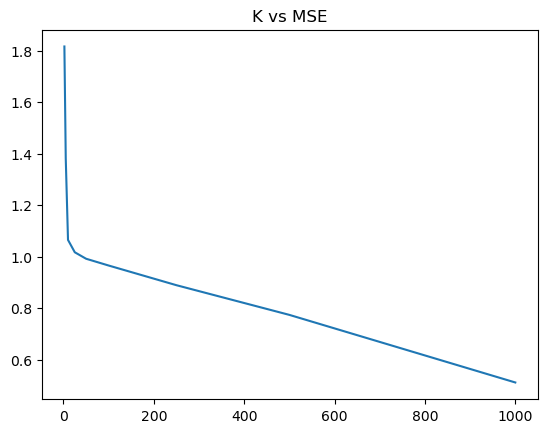

In [5]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]
for n in K:
  ### START CODE ###
  # For the chosen dataset, compute y_hat
  y_hat = estimator(datasets[0]['Y'],n)
  ### END CODE ###

  ### START CODE ###
  # Compute MSE
  mse = np.mean((datasets[0]['Y'] - y_hat)**2)
  ### END CODE ###
  mse_scores.append(mse)
plt.plot(K,mse_scores)
plt.title('K vs MSE')
plt.show()


e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

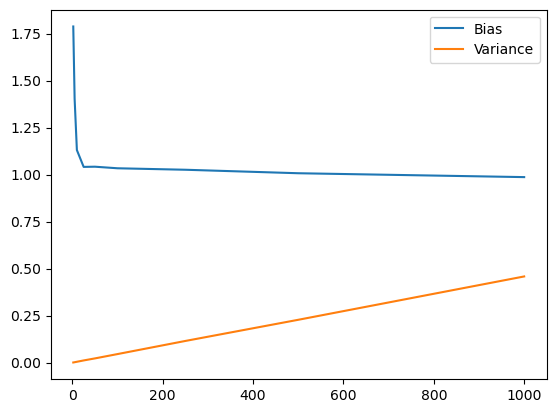

In [6]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    y_hat = estimator(y,n)
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = np.mean(pred_y, axis=1)  # 1D array of shape (2000,)
  # Compute the MSE between avg_yhat and y as bias
  bias = np.mean((avg_yhat - y) ** 2)
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = np.mean(np.var(pred_y, axis=1))
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)
plt.plot(K, bias_vals,label = 'Bias')
plt.plot(K, var_vals,label = 'Variance')
plt.legend()  
plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


Gradient Descent with momentum uses exponentially weigthed averages of gradients to update weights. This method helps to mitigate oscillations and noise in gradient update. The idea behind using exponentially weighted averages is to reduce back and forth movement in vertical direction during optimization when our goal is to take horizontal steps towards an optimal solution.
The exponential weighted averages over the past steps create "momentum" in consistent directions.


Since the vertical movements average out to be close to zero , they dampen out over moving averages. Horizontal movement (towards local minima) averages remain substantial , allowing significant progress in the optimal direction.This allows our optimization algorithm to follow a more direct and straight-forward path towards the best solution, reducing unnecessary up-and-down movements.

As the result the algorithm is able to reach local minima in a more accelerated and smoother fashion leading to faster convergence of the loss function.

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


Mini-batch Stochastic Gradient Descent offers a balanced advantage of both Stochastic Gradient Descent and Batch Gradient Descent.

The model update frequency is higher than BGD since we are passing the data into small batches and not the whole dataset itself. 
Hence it leads to faster convergence than Batch Gradient descent. If the size of the dataset is too large , then the memory consumption by BGD will be very high.

Its more efficient computationally than SGD since we are not updating the model at each data point.In more practical scenarios it makes sense to use MGD if the difference in loss function is only marginally better for SGD and hence it is more scalable and memory efficient. 

Overall , Mini Batch Gradient descent leads to more stable convergence of loss function as it reduces variance of parameter updates and strikes a balance between computational efficieny and training frequency.

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$





### Answer: ###
Assume $w^{\tau}$ to be the current coefficients, to get the updated coefficients $w^{\tau+1}$ for learning rate ($\eta$) using stochastic gradient descent, we get:
$$
w^{\tau+1} = w^{\tau} - \eta\nabla{L}
$$

where $L$ is the loss function: $L = \frac{1}{2}(t - y(w,x_{1},x_{2}))^2$

Calculating $\nabla{L}$ for the given function, we get: 

$$
\frac{\partial{L}}{\partial{w}} = -(t - y(w,x))\frac{\partial{y(w,x_{1},x_{2})}}{\partial{w}}
$$
where $ (t - y(w,x_{1},x_{2}))$ is the $error$

Taking the partial derivative for each weight $w_i$ we get: 

$$
w_0^{\tau+1} = w_0^{\tau} + \eta (error) 
$$
$$
w_1^{\tau+1} = w_1^{\tau} + \eta (error) e^{-x_{1}}
$$
$$
w_2^{\tau+1} = w_2^{\tau} + \eta (error)  x_{1}
$$
$$
w_3^{\tau+1} = w_3^{\tau} + \eta (error)  x_{1}x_{2}
$$


## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef - self.learning_rate*gradient
        return self.coef
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                error = y[i] - np.dot(X[i],self.coef)
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = -error*X[i] + self.regularization * self.coef
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X,self.coef)
        ### END CODE ###

In [8]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [9]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
lowest_mse = []

for lr in learning_rate:
    for reg in regularization:
        obj = Regression(lr, reg,n_epochs)
        obj.fit(X,y)
        lowest_mse.append([lr,reg, obj.lowest_mse])
        
df = pd.DataFrame(lowest_mse, columns=['learning_rate','regularization','lowest_mse'])
df

### END CODE ###

/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_1246/2080782027.py:36: RuntimeWarning: overflow encountered in multiply
  gradient = -error*X[i] + self.regularization * self.coef
/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_1246/2080782027.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate*gradient
/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_1246/2080782027.py:46: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_1246/2080782027.py:36: RuntimeWarning: invalid value encountered in multiply
  gradient = -error*X[i] + self.regularization * self.coef
/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_1246/2080782027.py:19: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate*gradient


,learning_rate,regularization,lowest_mse
0,0.0001,0,0.036821
1,0.0001,10,0.056126
2,0.0001,100,0.063636
3,0.0010,0,0.030496
4,0.0010,10,0.056034
5,0.0010,100,0.063492
6,0.0100,0,0.027391
7,0.0100,10,0.054626
8,0.0100,100,0.063437
9,0.1000,0,0.030988


Learning Rate 1:0.01  Regularization 1:0
Learning Rate 2:0.001  Regularization 2:0


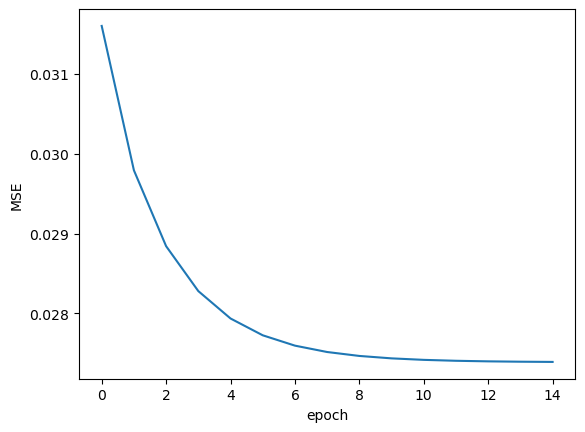

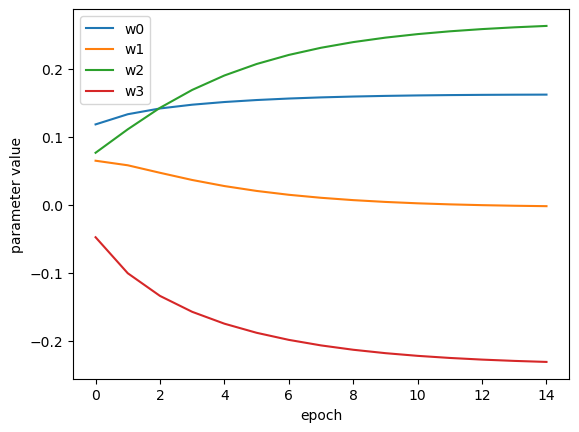

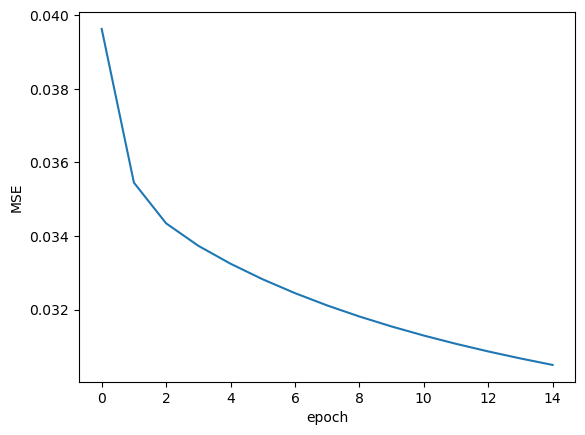

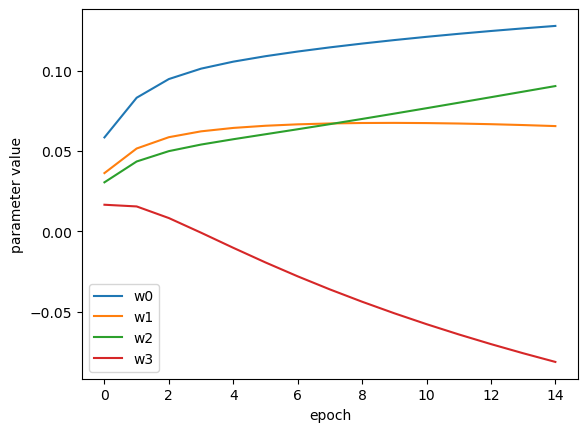

In [10]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
best_lr_1 = df.sort_values(by=['lowest_mse']).iloc[0,0]
best_lr_2 = df.sort_values(by=['lowest_mse']).iloc[1,0]
best_reg_1 = df.sort_values(by=['lowest_mse']).iloc[0,1]
best_reg_2 = df.sort_values(by=['lowest_mse']).iloc[1,1]


obj = Regression(best_lr_1,best_reg_1,n_epochs)
print('Learning Rate 1:' + str(best_lr_1) + '  Regularization 1:' + str(best_reg_1))
obj.fit(X,y,update_rule='sgd',plot=True)

obj = Regression(best_lr_2,best_reg_2,n_epochs)
print('Learning Rate 2:' + str(best_lr_2) + '  Regularization 2:' + str(best_reg_2))
obj.fit(X,y,update_rule='sgd',plot=True)

### END CODE ###

# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [11]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [12]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

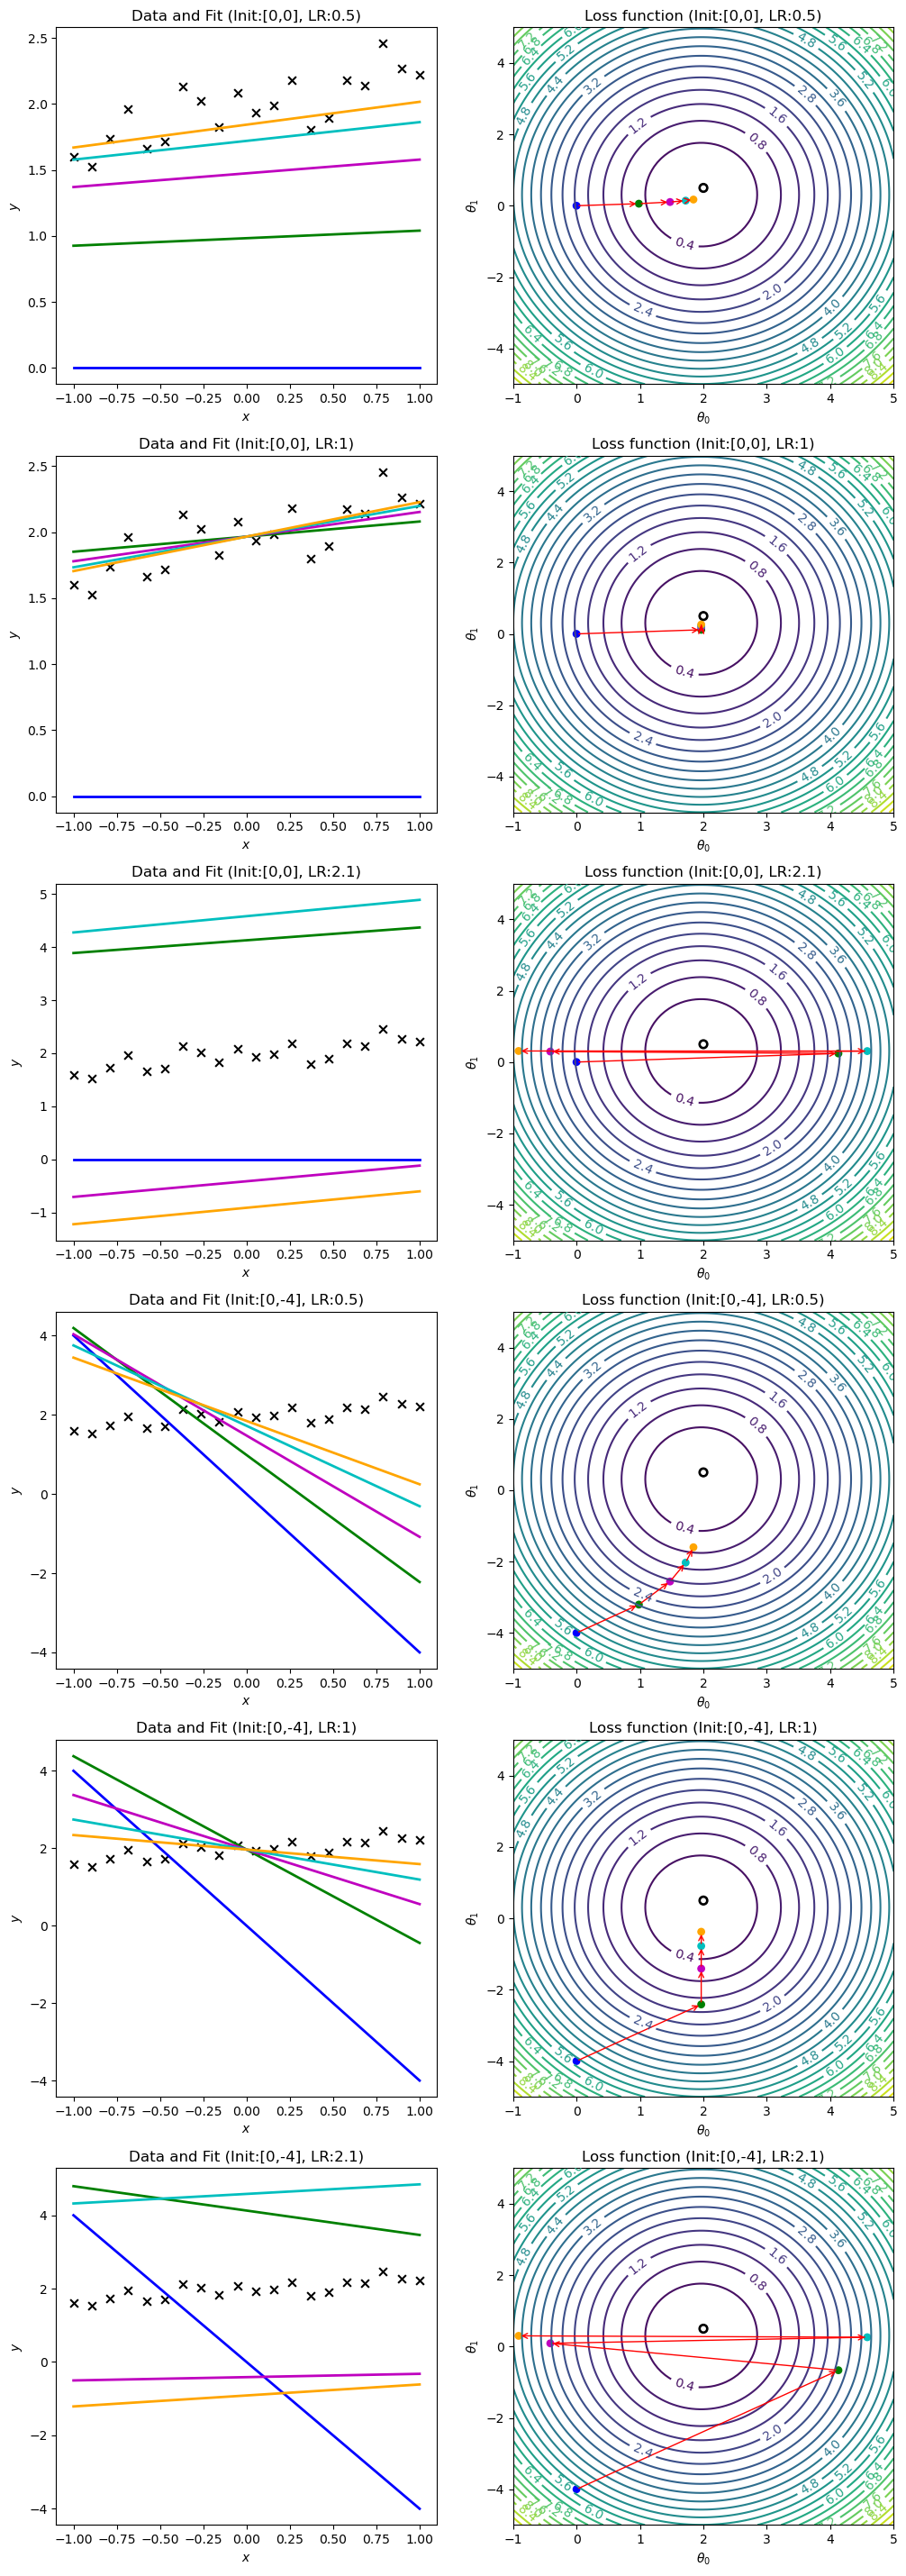

In [13]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [[0,0],[0,-4]]
lr_list = [0.5,1,2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] + (lr * np.sum((y - model(x, last_theta[0], last_theta[1])) * 1)) / len(x)
            this_theta[1] = last_theta[1] + (lr * np.sum((y - model(x, last_theta[0], last_theta[1])) * x)) / len(x)
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

1. **Initialization:**
    - With slow learning rates, we see that points at which we initialize are crucial for learning weights. If the optimal weights in the weight space are too distant from the initialized weights, the model will require lot of steps and time to converge to the solution. Weights initialized closer would require fewer steps.
    
    - For medium learning rates, the initialization point tends to be less critical as the model can cover larger distances. Weights initialized closely converge quickly, and even those initialized far off would converge in acceptable number of steps.
    
    - With high learning rates, the weights did not converge regardless of the initialization point. This is because the steps were too large, always overshooting the optimal solution, irrespective of the initial weights' location.

2. **Learning Rates:**
    - Keeping initialization points constant, we observe that the learning rate dictates how quickly, if at all, the solution converges. A slow rate implies that the solution will eventually be found even if it takes a lot of steps and time. A medium rate accelerates that convergence, but an excessively high rate results in overshooting and no result being found.

3. **Conclusion:**
    - This exercise underscores the significance of learning rates. They are pivotal for learning weights effectively. For every model, they must be tuned to optimize efficiency and to prevent diverging solution.